# Homework 7 Problem 2

## Luke Meiler

### Opening the Image

For this problem, we want to remove a periodic pattern on an image using FFTs. We start by importing a number of libraries to help us view the image that we want to modify.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image, ImageOps
import numpy as np
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext pycodestyle_magic
%pycodestyle_on

numpy.ndarray

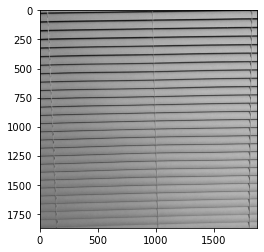

In [3]:
bilayer = np.array(ImageOps.grayscale(Image.open('FFT2.jpg')))
plt.imshow(bilayer, "gray")

type(bilayer[0])

### Taking the FFT

Here we see the image that we want to modify visualized in greyscale. This was accomplished using a library that opens the image as a numpy array. We then can take the FFT of this array as seen below.

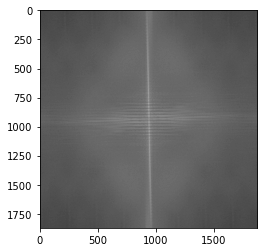

In [4]:
Fbilayer = np.fft.fft2(bilayer)
Fbilayercenter = np.fft.fftshift(Fbilayer)
plt.imshow(np.log(1+np.abs(Fbilayercenter)), "gray")

### Making the Filter

Now that we have the FFT image, we want to apply a filter onto it. We do this by making an N dimensional space, where N is the length of the image array. This lets us apply the filter later onto the image, as if they were different sizes, the array multiplication would not work. Since we used a square image, we do not need to do any padding or windowing on it, since it is already of the appropriate size. However, we could still do it to bring the value to a value of $2^N$ to increase computation speed.

The filter that we are going to make is a filter that takes quadrants one and three of the fourier transformed image, and turns the rest to black. This is done and visualized below, first as just the filter, and then the filter on the FFT image.

In [6]:
N = 1871
x = np.linspace(-10, 10, N)
y = np.linspace(-10, 10, N)

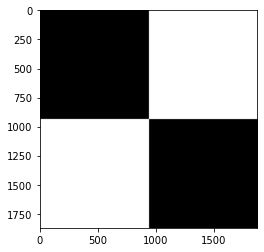

In [7]:
R = 0.000001
xx, yy = np.meshgrid(x, y, sparse=True)
lowpass = (np.sqrt(xx**2 + yy**2) >= R)*1

lowpass_rect = ((xx * yy) <= R)*1

plt.imshow(lowpass_rect, "gray")

### Applying the Filter

Now that the filter is made, we apply it onto the FFT image that we made earlier, just as we did in class. Last, we take the inverse FFT of this filtered image, and display it.

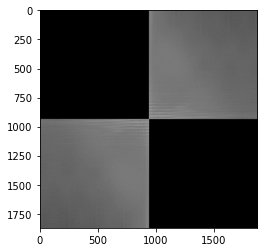

In [8]:
plt.imshow(np.log(1+np.abs(lowpass_rect*Fbilayercenter)), "gray")

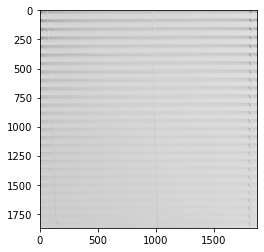

In [9]:
filtered = np.fft.ifft2(lowpass_rect*Fbilayercenter)
plt.imshow(np.log(1+np.abs(filtered)), "gray")

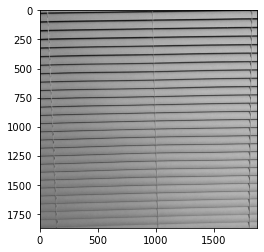

In [10]:
plt.imshow(bilayer, "gray")

We can see here in the first image that the periodic black pattern has been significantly reduced from the second displayed image, which is just the original. I am not sure if this is due to just saturating the image with white instead of targeting the actual periodic pattern. Either way, the periodic pattern has been greatly reduced using FFTs.